# FDA HW1 part2

Dataset:https://www.kaggle.com/zynicide/wine-reviews/downloads/winemag-data-130k-v2.csv/4


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_path = "./winemag-data-130k-v2.csv"
pd_data = pd.read_csv(data_path)
type(pd_data)


pandas.core.frame.DataFrame

### Columns
* country: The country that the wine is from
* description
* designation: The vineyard within the winery where the grapes that made the wine are from
* points: The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)
* price: The cost for a bottle of the wine
* province: The province or state that the wine is from
* region_1: The wine growing area in a province or state (ie Napa)
* region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank
* taster_name
* taster_twitter_handle
* title: The title of the wine review, which often contains the vintage if you're interested in extracting that feature
* variety: The type of grapes used to make the wine (ie Pinot Noir)
* winery: The winery that made the wine

In [94]:
pd_data.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [95]:
pd_data.shape

(129971, 14)

In [96]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


## 最多酒發源地的國家前10名

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64


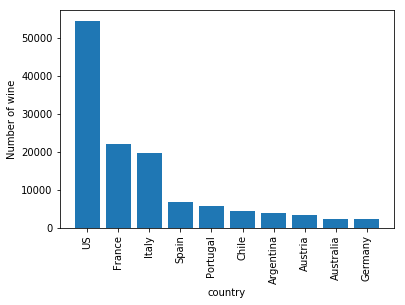

In [97]:
country_count = pd_data['country'].value_counts()[:10]
print(country_count)

plt.xticks(rotation='vertical')
plt.bar(country_count.index, country_count)
plt.xlabel('country')
plt.ylabel('Number of wine')

plt.show()

In [98]:
country = pd_data.groupby(['country'])
count = country.size()
count = count.reset_index(name='count')
count

,country,count
0,Argentina,3800
1,Armenia,2
2,Australia,2329
3,Austria,3345
4,Bosnia and Herzegovina,2
5,Brazil,52
6,Bulgaria,141
7,Canada,257
8,Chile,4472
9,China,1


## 列表顯示國家產出的酒平均價格和平均分數

In [99]:
sort_country = list(count.sort_values(by=['count'], ascending=False).country)
#print(sort_country)

ans_data = { 'country': [], 'taster_name': [], 'price mean':[], 'Score count': [],'point mean': []}

for country in sort_country:
    country_data = pd_data.loc[pd_data['country'] == country]
    count = country_data.shape[0] 
    taster_name = country_data['taster_name'].values[0]
    point_mean = np.mean(country_data['points'].values)
    price_mean = np.mean(country_data['price'].values)
    ans_data['country'].append(country)
    ans_data['taster_name'].append(taster_name)
    ans_data['Score count'].append(count)
    ans_data['price mean'].append(price_mean)
    ans_data['point mean'].append(point_mean)

ans = pd.DataFrame(ans_data)

ans.head(20)

,country,taster_name,price mean,Score count,point mean
0,US,Paul Gregutt,NaN,54504,88.563720
1,France,Roger Voss,NaN,22093,88.845109
2,Italy,Kerin O’Keefe,NaN,19540,88.562231
3,Spain,Michael Schachner,NaN,6645,87.288337
4,Portugal,Roger Voss,NaN,5691,88.250220
5,Chile,Michael Schachner,NaN,4472,86.493515
6,Argentina,Michael Schachner,NaN,3800,86.710263
7,Austria,Anne Krebiehl MW,NaN,3345,90.101345
8,Australia,Joe Czerwinski,NaN,2329,88.580507
9,Germany,Anna Lee C. Iijima,NaN,2165,89.851732


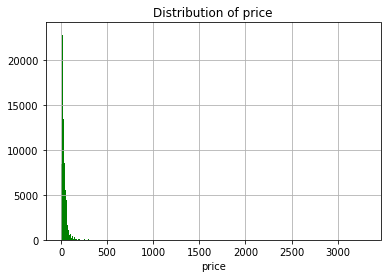

In [109]:
prices = []
for price, i in zip(pd_data['price'], range(pd_data['price'].count())):
    if np.isnan(price):
        prices.append(-1.0)
    else:
        prices.append(price)
plt.grid()
plt.title('Distribution of price')
plt.xlabel('price')
plt.hist(prices, bins = 500, color='green')
plt.show()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Name: taster_name, dtype: int64


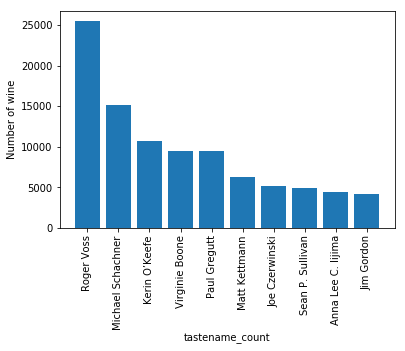

In [110]:
tastename_count = pd_data['taster_name'].value_counts()[:10]
print(tastename_count)

plt.xticks(rotation='vertical')
plt.bar(tastename_count.index, tastename_count)
plt.xlabel('tastename_count')
plt.ylabel('Number of wine')

plt.show()